# Correlation analysis on samples

In this example we are going to estimate the correlation between an output sample Y and the corresponding inputs using various estimators:

- Pearson coefficients
- Spearman coefficients
- PCC: Partial Correlation Coefficients
- PRCC: Partial Rank Correlation Coefficient
- SRC: Standard Regression Coefficients
- SRRC: Standard Rank Regression Coefficient

In [13]:
from __future__ import print_function
import openturns as ot

In [14]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
formula = ['X3+sin(pi_*X1)+7*sin(X2)*sin(pi_*X2)+' + \
           '1.2*((pi_*X3)*(pi_*X2))*sin(pi_*X1)']
input_names = ['X1', 'X2', 'X3']
model = ot.SymbolicFunction(input_names, formula)
distribution = ot.ComposedDistribution([ot.Uniform(-1.0, 1.0)] * 3, \
                                        ot.IndependentCopula(3))
size = 100
inputDesign = ot.SobolIndicesExperiment(distribution, size, True).generate()
outputDesign = model(inputDesign)

In [16]:
# PCC
indices = ot.CorrelationAnalysis.PCC(inputDesign, outputDesign)
print(indices)

[0.195052,0.0183082,0.171376]


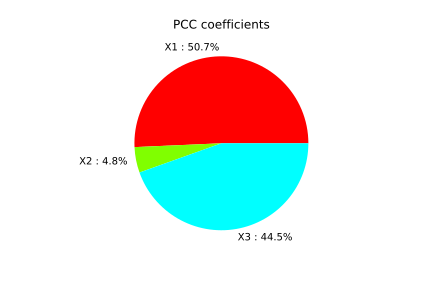

In [17]:
ot.SaltelliSensitivityAlgorithm.DrawImportanceFactors(indices, input_names, 'PCC coefficients')

In [18]:
# PRCC
indices = ot.CorrelationAnalysis.PRCC(inputDesign, outputDesign)
print(indices)

[0.218657,0.00540221,0.14355]


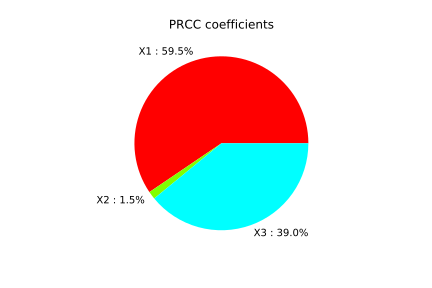

In [19]:
ot.SaltelliSensitivityAlgorithm.DrawImportanceFactors(indices, input_names, 'PRCC coefficients')

In [ ]:
# SRC
indices = ot.CorrelationAnalysis.SRC(inputDesign, outputDesign)
print(indices)

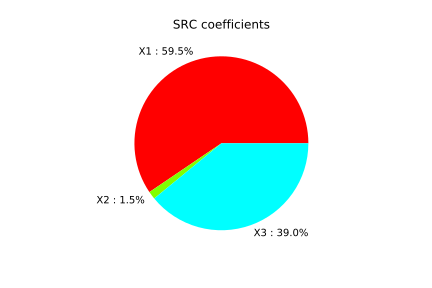

In [20]:
ot.SaltelliSensitivityAlgorithm.DrawImportanceFactors(indices, input_names, 'SRC coefficients')

In [21]:
# SRRC
indices = ot.CorrelationAnalysis.SRC(inputDesign, outputDesign)
print(indices)

[0.563513,0.00478466,0.431703]


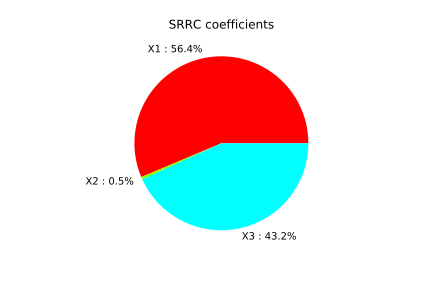

In [22]:
ot.SaltelliSensitivityAlgorithm.DrawImportanceFactors(indices, input_names, 'SRRC coefficients')

In [25]:
# Pearson
indices = ot.CorrelationAnalysis.PearsonCorrelation(inputDesign, outputDesign)
print(indices)

[0.19407781325146287, 0.021056409483931532, 0.1714764078381607]

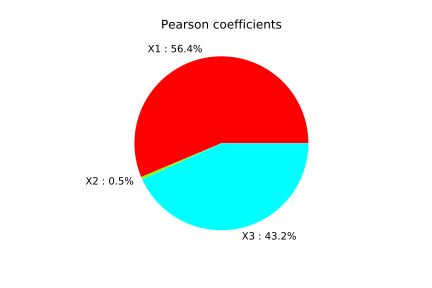

In [26]:
ot.SaltelliSensitivityAlgorithm.DrawImportanceFactors(indices, input_names, 'Pearson')

In [27]:
# Pearson
indices = ot.CorrelationAnalysis.SpearmanCorrelation(inputDesign, outputDesign)
print(indices)

[0.21831777454793413, 0.007333034892373191, 0.14347315551269832]


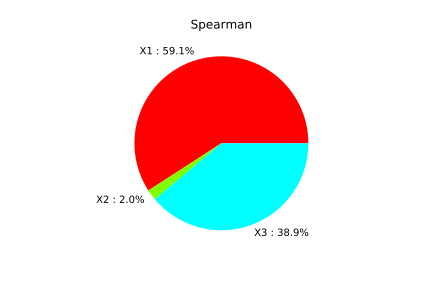

In [28]:
ot.SaltelliSensitivityAlgorithm.DrawImportanceFactors(indices, input_names, 'Spearman')